In [64]:
import matplotlib.pyplot as plt
import numpy as np
import tifffile as tiff
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.models import Sequential

In [65]:
x_train = tiff.imread('../data/soil_sealing/x_train.tif')
y_train = tiff.imread('../data/soil_sealing/y_train.tif')
x_test = tiff.imread('../data/soil_sealing/x_test.tif')
y_test = tiff.imread('../data/soil_sealing/y_test.tif')

### inverse 0 and 1

In [66]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1], dtype=int32), array([ 99106, 118694], dtype=int64))
(array([0, 1], dtype=int32), array([50196, 35644], dtype=int64))


### now it should be flipped

In [67]:
y_train = np.where((y_train == 0) | (y_train == 1), y_train ^ 1, y_train)
print(np.unique(y_train, return_counts=True))

y_test = np.where((y_test == 0) | (y_test == 1), y_test ^ 1, y_test)
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int32), array([118694,  99106], dtype=int64))


(array([0, 1], dtype=int32), array([35644, 50196], dtype=int64))

### reshaping

In [68]:
x_train_reshaped = x_train.reshape(
    x_train.shape[0] * x_train.shape[1],
    x_train.shape[2],
)
y_train_reshaped = y_train.reshape(y_train.shape[0] * y_train.shape[1])

x_test_reshaped = x_test.reshape(
    x_test.shape[0] * x_test.shape[1],
    x_test.shape[2],
)
y_test_reshaped = y_test.reshape(y_test.shape[0] * y_test.shape[1])

### build model

In [69]:
layer = Normalization()
layer.adapt(x_train_reshaped)

In [71]:
model = Sequential()
model.add(layer)
model.add(Dense(64, activation='relu', input_shape=(10,)))
model.add(Dropout(rate=0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.1))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# different to regression, because it's a classification
optimizer = keras.optimizers.RMSprop(learning_rate=0.008)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy'],
)
history = model.fit(x_train_reshaped, y_train_reshaped, epochs=10)

Epoch 1/10
6807/6807 [==============================] - 49s 7ms/step - loss: 0.2259 - accuracy: 0.9196
Epoch 2/10
6807/6807 [==============================] - 50s 7ms/step - loss: 0.2838 - accuracy: 0.9193
Epoch 3/10
6807/6807 [==============================] - 49s 7ms/step - loss: 0.3384 - accuracy: 0.9192
Epoch 4/10
6807/6807 [==============================] - 48s 7ms/step - loss: 0.2828 - accuracy: 0.9183
Epoch 5/10
6807/6807 [==============================] - 49s 7ms/step - loss: 0.3516 - accuracy: 0.9184
Epoch 6/10
6807/6807 [==============================] - 51s 7ms/step - loss: 0.3033 - accuracy: 0.9184
Epoch 7/10
6807/6807 [==============================] - 49s 7ms/step - loss: 0.3315 - accuracy: 0.9185
Epoch 8/10
6807/6807 [==============================] - 50s 7ms/step - loss: 0.3234 - accuracy: 0.9183
Epoch 9/10
6807/6807 [==============================] - 49s 7ms/step - loss: 0.3673 - accuracy: 0.9179
Epoch 10/10
6807/6807 [==============================] - 50s 7ms/step - l

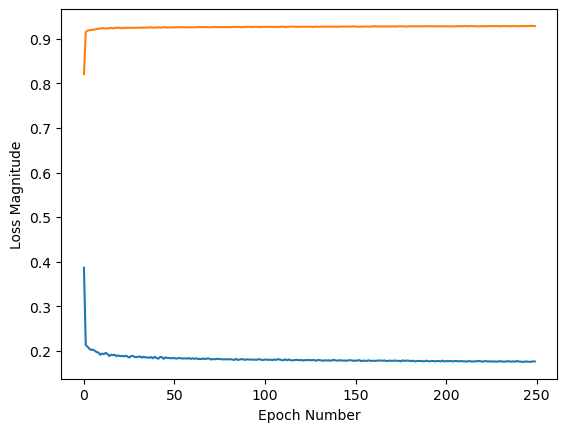

In [59]:
#  0.9267
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.show()

### Evalute on validation data

In [60]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 17ms/step - loss: 0.2379 - accuracy: 0.9020


[0.2379174530506134, 0.901957094669342]

### predict some data

In [61]:
feature = 27
print(f'real class {y_test_reshaped[feature]}')

real class [0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
model.predict(x_test[feature, :].reshape(1, -1))

## turn `y_test` and `y_test_pred` into images

In [72]:
y_test_reshaped_new = y_test.reshape(290, 296)

y_test_pred = model.predict(x_test_reshaped)
y_test_pred = y_test_pred.reshape(290, 296)

tiff.imsave('../data/probability_map.tif', y_test_pred)
tiff.imsave('../data/y_test.tif', y_test)

2683/2683 [==============================] - 5s 2ms/step
